In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
# import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

In [1]:
%matplotlib inline

## Importing Data

#### 1) Data Dictionary

In [2]:
import xlrd
import openpyxl

In [3]:
data_dict = pd.read_excel('data/zillow_data_dictionary.xlsx', 'Data Dictionary')
data_dict.tail()

,Feature,Description,비고,Unnamed: 3
53,'landtaxvaluedollarcnt',The assessed value of the land area of the parcel,NaN,NaN
54,'taxamount',The total property tax assessed for that asses...,NaN,NaN
55,'assessmentyear',The year of the property tax assessment,NaN,NaN
56,'taxdelinquencyflag',Property taxes for this parcel are past due as...,NaN,NaN
57,'taxdelinquencyyear',Year for which the unpaid propert taxes were due,NaN,NaN


#### 2) Train data

In [3]:
train16 = pd.read_csv('data/train_2016_v2.csv', parse_dates=["transactiondate"])
train16.tail()

,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [4]:
train17 = pd.read_csv('data/train_2017.csv', parse_dates=["transactiondate"])
train17.tail()

,parcelid,logerror,transactiondate
77608,10833991,-0.002245,2017-09-20
77609,11000655,0.020615,2017-09-20
77610,17239384,0.013209,2017-09-21
77611,12773139,0.037129,2017-09-21
77612,12826780,0.007204,2017-09-25


In [5]:
print("shape Of train16: ",train16.shape)
print("shape Of train17: ",train17.shape)

shape Of train16:  (90275, 3)
shape Of train17:  (77613, 3)


#### 3) Properties Data

In [6]:
prop16 = pd.read_csv('data/properties_2016.csv')
prop16.tail()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
prop17 = pd.read_csv('data/properties_2017.csv')
prop17.tail()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,12170430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,11422430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,17203030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,14242830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,12766630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print("shape Of prop16: ", prop16.shape)
print("shape Of prop17: ", prop17.shape)

shape Of prop16:  (2985217, 58)
shape Of prop17:  (2985217, 58)


##### prop16과 prop17은 동일한 집에 대한 데이터들인가? (parcelid가 같은 data인가?)

#### train & properties merge

In [9]:
merged16 = pd.merge(train16, prop16, on="parcelid", how="left")
merged16.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
90270,10774160,-0.0356,2016-12-30,1.0,NaN,NaN,1.0,1.0,NaN,4.0,...,NaN,NaN,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,NaN,6.037132e+13
90271,12046695,0.0070,2016-12-30,NaN,NaN,NaN,3.0,3.0,NaN,4.0,...,NaN,NaN,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,NaN,6.037301e+13
90272,12995401,-0.2679,2016-12-30,NaN,NaN,NaN,2.0,4.0,NaN,7.0,...,NaN,NaN,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.0,6.037433e+13
90273,11402105,0.0602,2016-12-30,NaN,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,132991.0,165869.0,2015.0,32878.0,2285.57,NaN,NaN,6.037601e+13
90274,12566293,0.4207,2016-12-30,NaN,NaN,NaN,1.0,3.0,NaN,7.0,...,NaN,NaN,66258.0,163037.0,2015.0,96779.0,2560.96,NaN,NaN,6.037544e+13


In [10]:
merged17 = pd.merge(train17, prop17, on="parcelid", how="left")
merged17.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
77608,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13
77609,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,6.0,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13
77610,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13
77611,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,4.0,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13
77612,12826780,0.007204,2017-09-25,NaN,NaN,NaN,2.0,3.0,NaN,6.0,...,NaN,NaN,140000.0,522000.0,2016.0,382000.0,6317.15,NaN,NaN,6.037503e+13


### merged16과 merge17을 위아래로 연결해서 자료를 하나로 합치면 될 것 같아요 

In [13]:
merged_df = pd.concat([merged16, merged17]).reset_index(drop=True)
merged_df.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
167883,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13
167884,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,6.0,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13
167885,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13
167886,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,4.0,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13
167887,12826780,0.007204,2017-09-25,NaN,NaN,NaN,2.0,3.0,NaN,6.0,...,NaN,NaN,140000.0,522000.0,2016.0,382000.0,6317.15,NaN,NaN,6.037503e+13


In [14]:
print("shape Of merged_df: ", merged_df.shape)

shape Of merged_df:  (167888, 60)


## EDA

### 1) Train Data

#### How many transaction occured for each house?
- most houses have been sold only one time

In [15]:
(train_2016['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

In [16]:
(train_2017['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    77218
2      193
3        3
Name: parcelid, dtype: int64

#### log error

In [36]:
np.sort(train_2016["logerror"])

array([-4.605, -4.605, -4.51 , ...,  4.445,  4.52 ,  4.737])

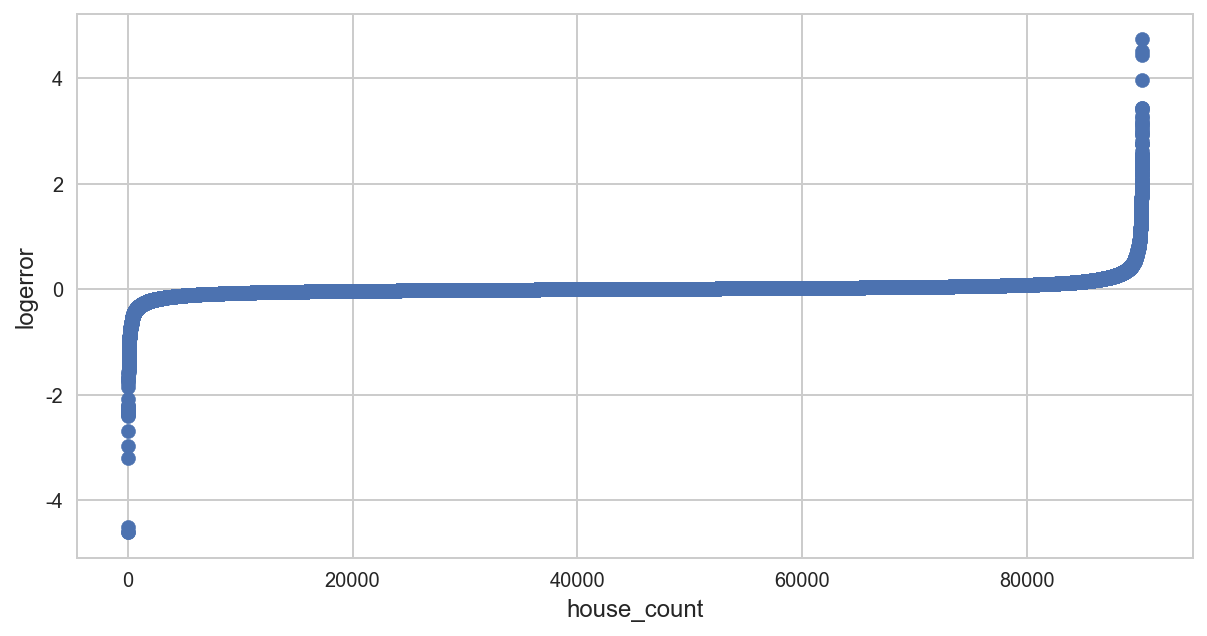

In [37]:
# logerror를 정렬하여 분포를 살펴봄
plt.figure(figsize=(10,5))
plt.scatter(range(train_2016.shape[0]), np.sort(train_2016["logerror"]))
plt.xlabel('house_count', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

In [38]:
# log error min, max, mean
print("logerror max:", np.max(train_2016["logerror"]))
print("logerror min:", np.min(train_2016["logerror"]))
print("logerror mean:", np.mean(train_2016["logerror"]))
# print("logerror stdev:", np.stdev(train_2016["logerror"]))

logerror max: 4.737
logerror min: -4.605
logerror mean: 0.011457219606756682


In [16]:
# 양 끝의 1%를 limit값으로 설정
ulimit = np.percentile(train_2016.logerror.values, 99)
llimit = np.percentile(train_2016.logerror.values, 1)
ulimit, llimit

(0.4638819999999963, -0.3425)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


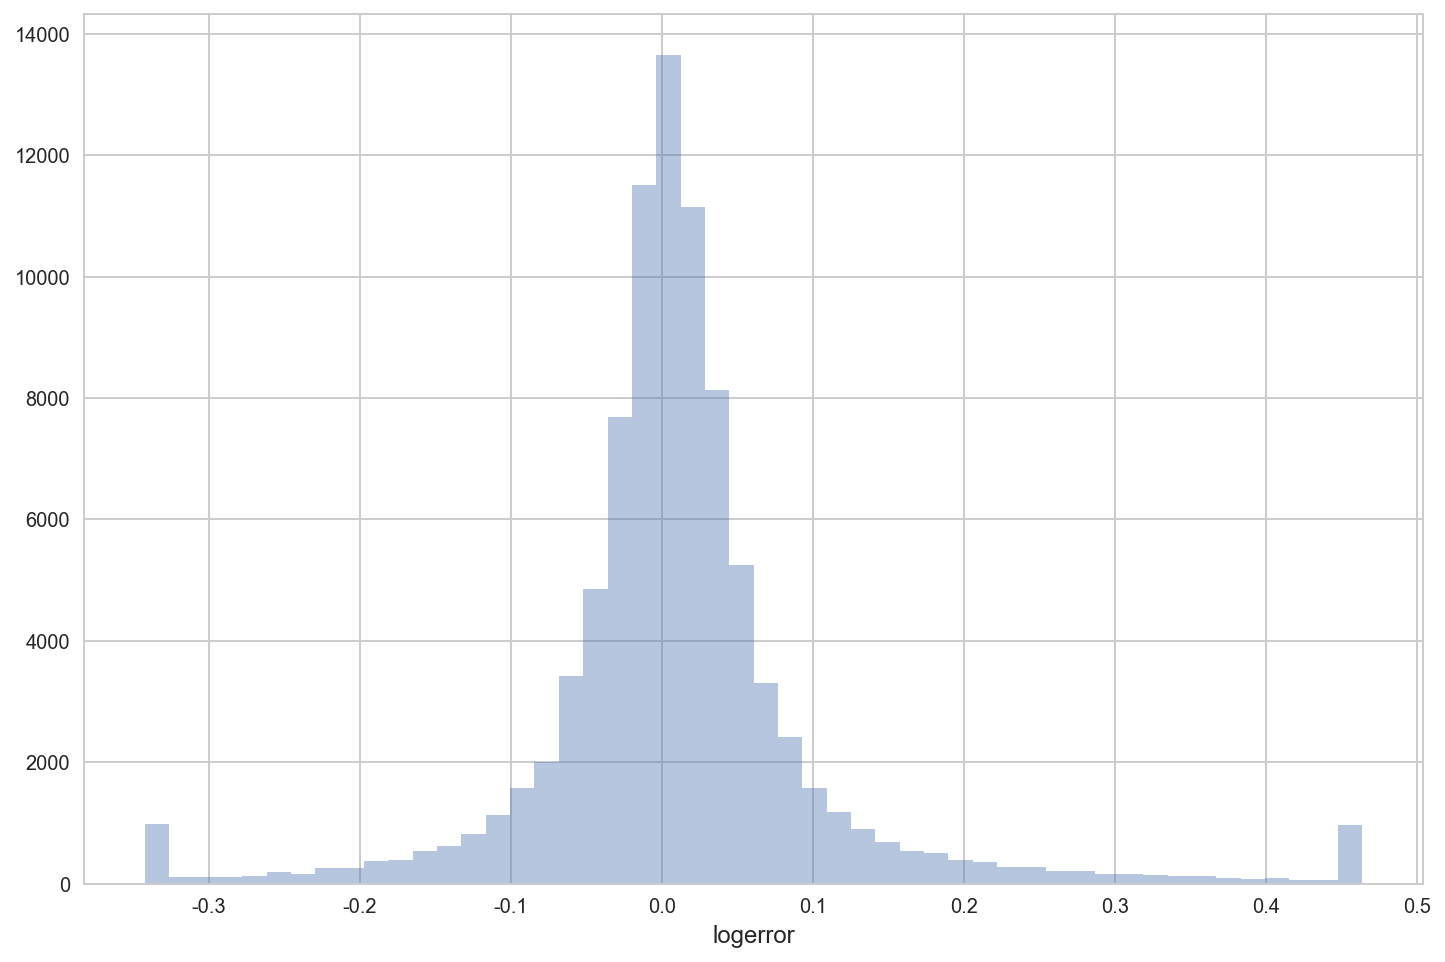

In [21]:
# log error histogram
train_2016['logerror'].ix[train_2016['logerror']>ulimit] = ulimit
train_2016['logerror'].ix[train_2016['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_2016["logerror"], bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

### 2) Properties Data

In [70]:
prop16_des = prop16.describe(include='all').transpose()
prop16_des.tail()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
landtaxvaluedollarcnt,2.91748e+06,NaN,NaN,NaN,252478,445013,1,74836,167042,306918,9.02462e+07
taxamount,2.95397e+06,NaN,NaN,NaN,5377.61,9183.11,1.34,2461.07,3991.78,6201.01,3.45886e+06
taxdelinquencyflag,56462,1,Y,56462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taxdelinquencyyear,56464,NaN,NaN,NaN,13.8924,2.58101,0,14,14,15,99
censustractandblock,2.91009e+06,NaN,NaN,NaN,6.04843e+13,3.24903e+11,-1,6.0374e+13,6.03757e+13,6.05904e+13,4.8303e+14


In [71]:
prop16_dtype = prop16.dtypes
prop16_dtype.tail()

landtaxvaluedollarcnt    float64
taxamount                float64
taxdelinquencyflag        object
taxdelinquencyyear       float64
censustractandblock      float64
dtype: object

In [72]:
prop16_des["dtype"] = prop16_dtype
# prop16_des.reset_index(inplace = True)
# prop16_des.rename(columns={"index":"variable"}, inplace=True)

In [73]:
prop16_des

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype
parcelid,2.98522e+06,NaN,NaN,NaN,1.33259e+07,7.90997e+06,1.07117e+07,1.16437e+07,1.25451e+07,1.40971e+07,1.69602e+08,int64
airconditioningtypeid,811519,NaN,NaN,NaN,1.93117,3.14859,1,1,1,1,13,float64
architecturalstyletypeid,6061,NaN,NaN,NaN,7.20261,2.43629,2,7,7,7,27,float64
basementsqft,1628,NaN,NaN,NaN,646.883,538.793,20,272,534,847.25,8516,float64
bathroomcnt,2.97376e+06,NaN,NaN,NaN,2.20914,1.07775,0,2,2,3,20,float64
bedroomcnt,2.97377e+06,NaN,NaN,NaN,3.08895,1.27586,0,2,3,4,20,float64
buildingclasstypeid,12629,NaN,NaN,NaN,3.72595,0.5017,1,3,4,4,5,float64
buildingqualitytypeid,1.93849e+06,NaN,NaN,NaN,5.78479,1.80535,1,4,7,7,12,float64
calculatedbathnbr,2.85630e+06,NaN,NaN,NaN,2.29926,1.00074,1,2,2,3,20,float64
decktypeid,17096,NaN,NaN,NaN,66,0,66,66,66,66,66,float64


In [74]:
prop17_des = prop17.describe(include='all').transpose()
prop17_dtype = prop17.dtypes
prop17_des["dtype"] = prop17_dtype
# prop17_des.reset_index(inplace = True)
# prop17_des.rename(columns={"index":"variable"}, inplace=True)

In [75]:
prop17_des

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype
parcelid,2.98522e+06,NaN,NaN,NaN,1.33259e+07,7.90997e+06,1.07117e+07,1.16437e+07,1.25451e+07,1.40971e+07,1.69602e+08,int64
airconditioningtypeid,815362,NaN,NaN,NaN,1.94572,3.16051,1,1,1,1,13,float64
architecturalstyletypeid,6061,NaN,NaN,NaN,7.20261,2.43629,2,7,7,7,27,float64
basementsqft,1627,NaN,NaN,NaN,647.221,538.787,20,272,535,847.5,8516,float64
bathroomcnt,2.98226e+06,NaN,NaN,NaN,2.2162,1.07825,0,2,2,3,32,float64
bedroomcnt,2.98227e+06,NaN,NaN,NaN,3.09336,1.27157,0,2,3,4,25,float64
buildingclasstypeid,12731,NaN,NaN,NaN,3.73474,0.500371,1,3,4,4,5,float64
buildingqualitytypeid,1.9414e+06,NaN,NaN,NaN,6.28082,1.72992,1,5,6,8,12,float64
calculatedbathnbr,2.86806e+06,NaN,NaN,NaN,2.30383,1.00324,1,2,2,3,32,float64
decktypeid,17379,NaN,NaN,NaN,66,0,66,66,66,66,66,float64


#### Missing data

##### 1) missing data prop16

In [123]:
prop16_des["missing_rate"] = 1-(prop16_des["count"]/prop16.shape[0])
prop16_missing = pd.DataFrame(prop16_des["missing_rate"].sort_values(ascending=False))
prop16_missing

,missing_rate
storytypeid,0.999456
basementsqft,0.999455
yardbuildingsqft26,0.999113
fireplaceflag,0.99827
architecturalstyletypeid,0.99797
typeconstructiontypeid,0.99774
finishedsquarefeet13,0.99743
buildingclasstypeid,0.995769
decktypeid,0.994273
finishedsquarefeet6,0.99263


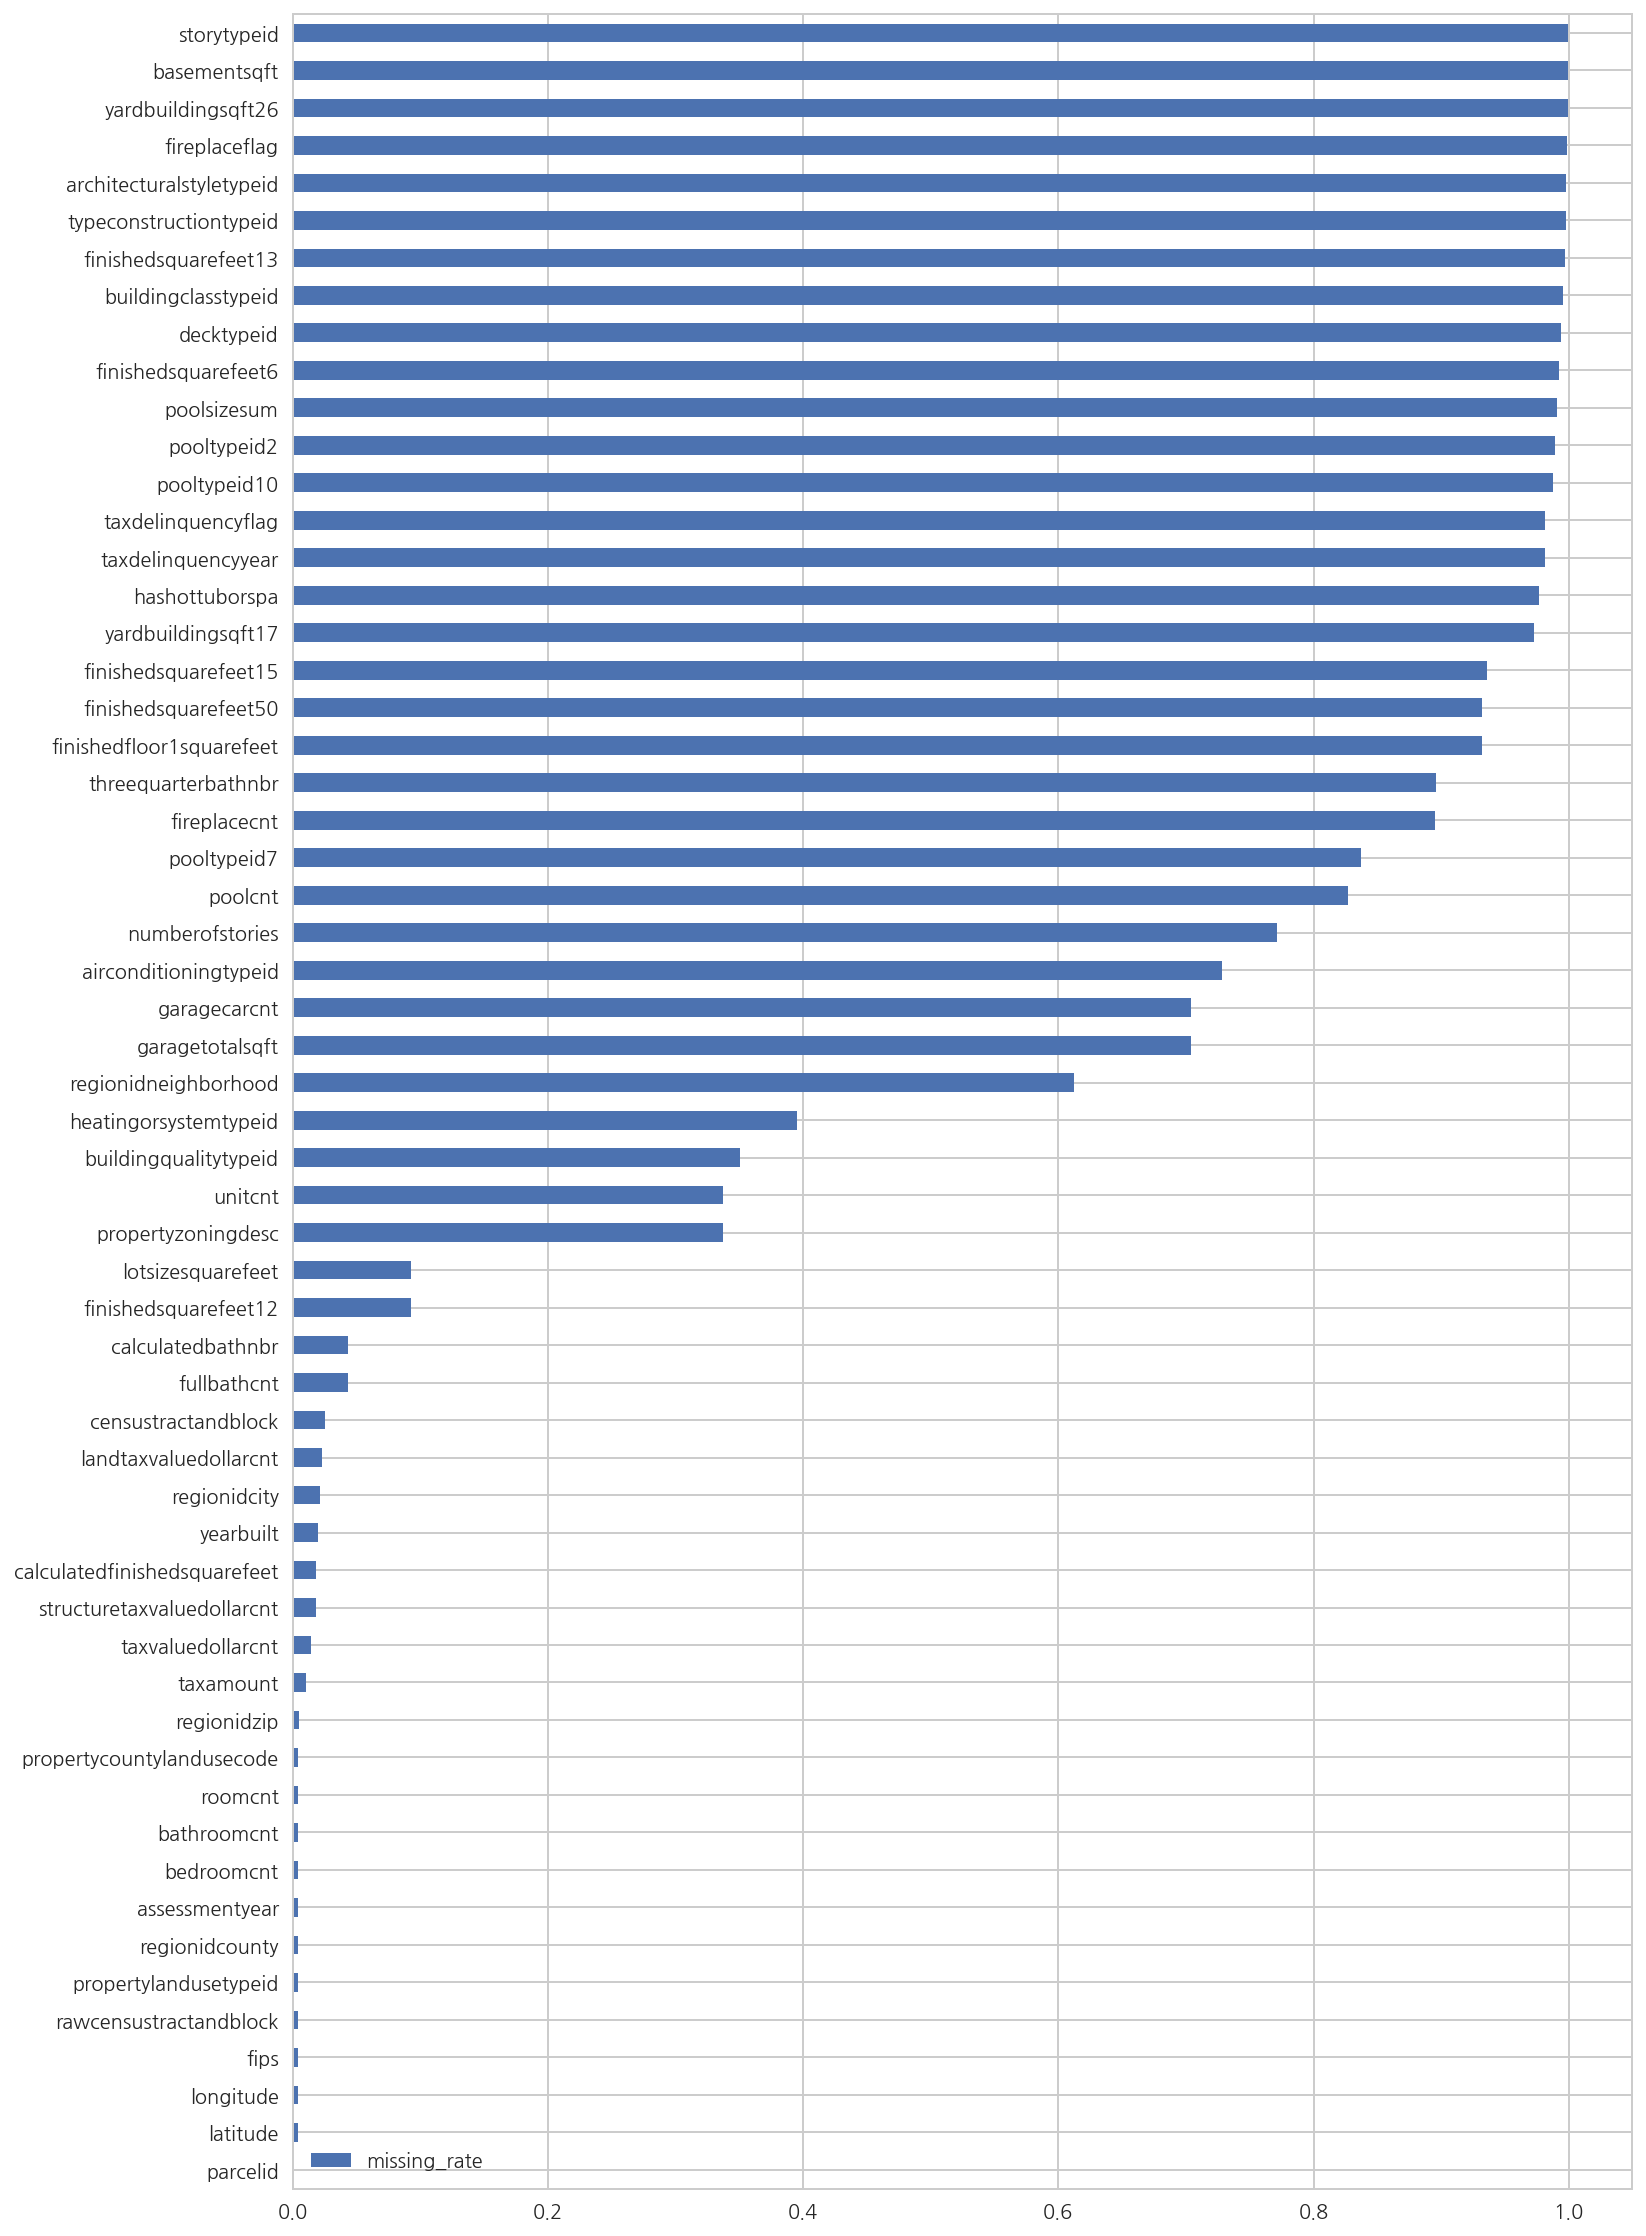

In [82]:
prop16_missing.sort_values(by = "missing_rate", ascending = True)\
.plot(kind = 'barh', figsize=(12,20))

##### 2) missing data prop17

In [124]:
prop17_des["missing_rate"] = 1-(prop17_des["count"]/prop17.shape[0])
prop17_missing = pd.DataFrame(prop17_des["missing_rate"].sort_values(ascending=False))
prop17_missing

,missing_rate
storytypeid,0.999456
basementsqft,0.999455
yardbuildingsqft26,0.999114
fireplaceflag,0.99827
architecturalstyletypeid,0.99797
typeconstructiontypeid,0.99774
finishedsquarefeet13,0.99743
buildingclasstypeid,0.995735
pooltypeid10,0.994303
decktypeid,0.994178


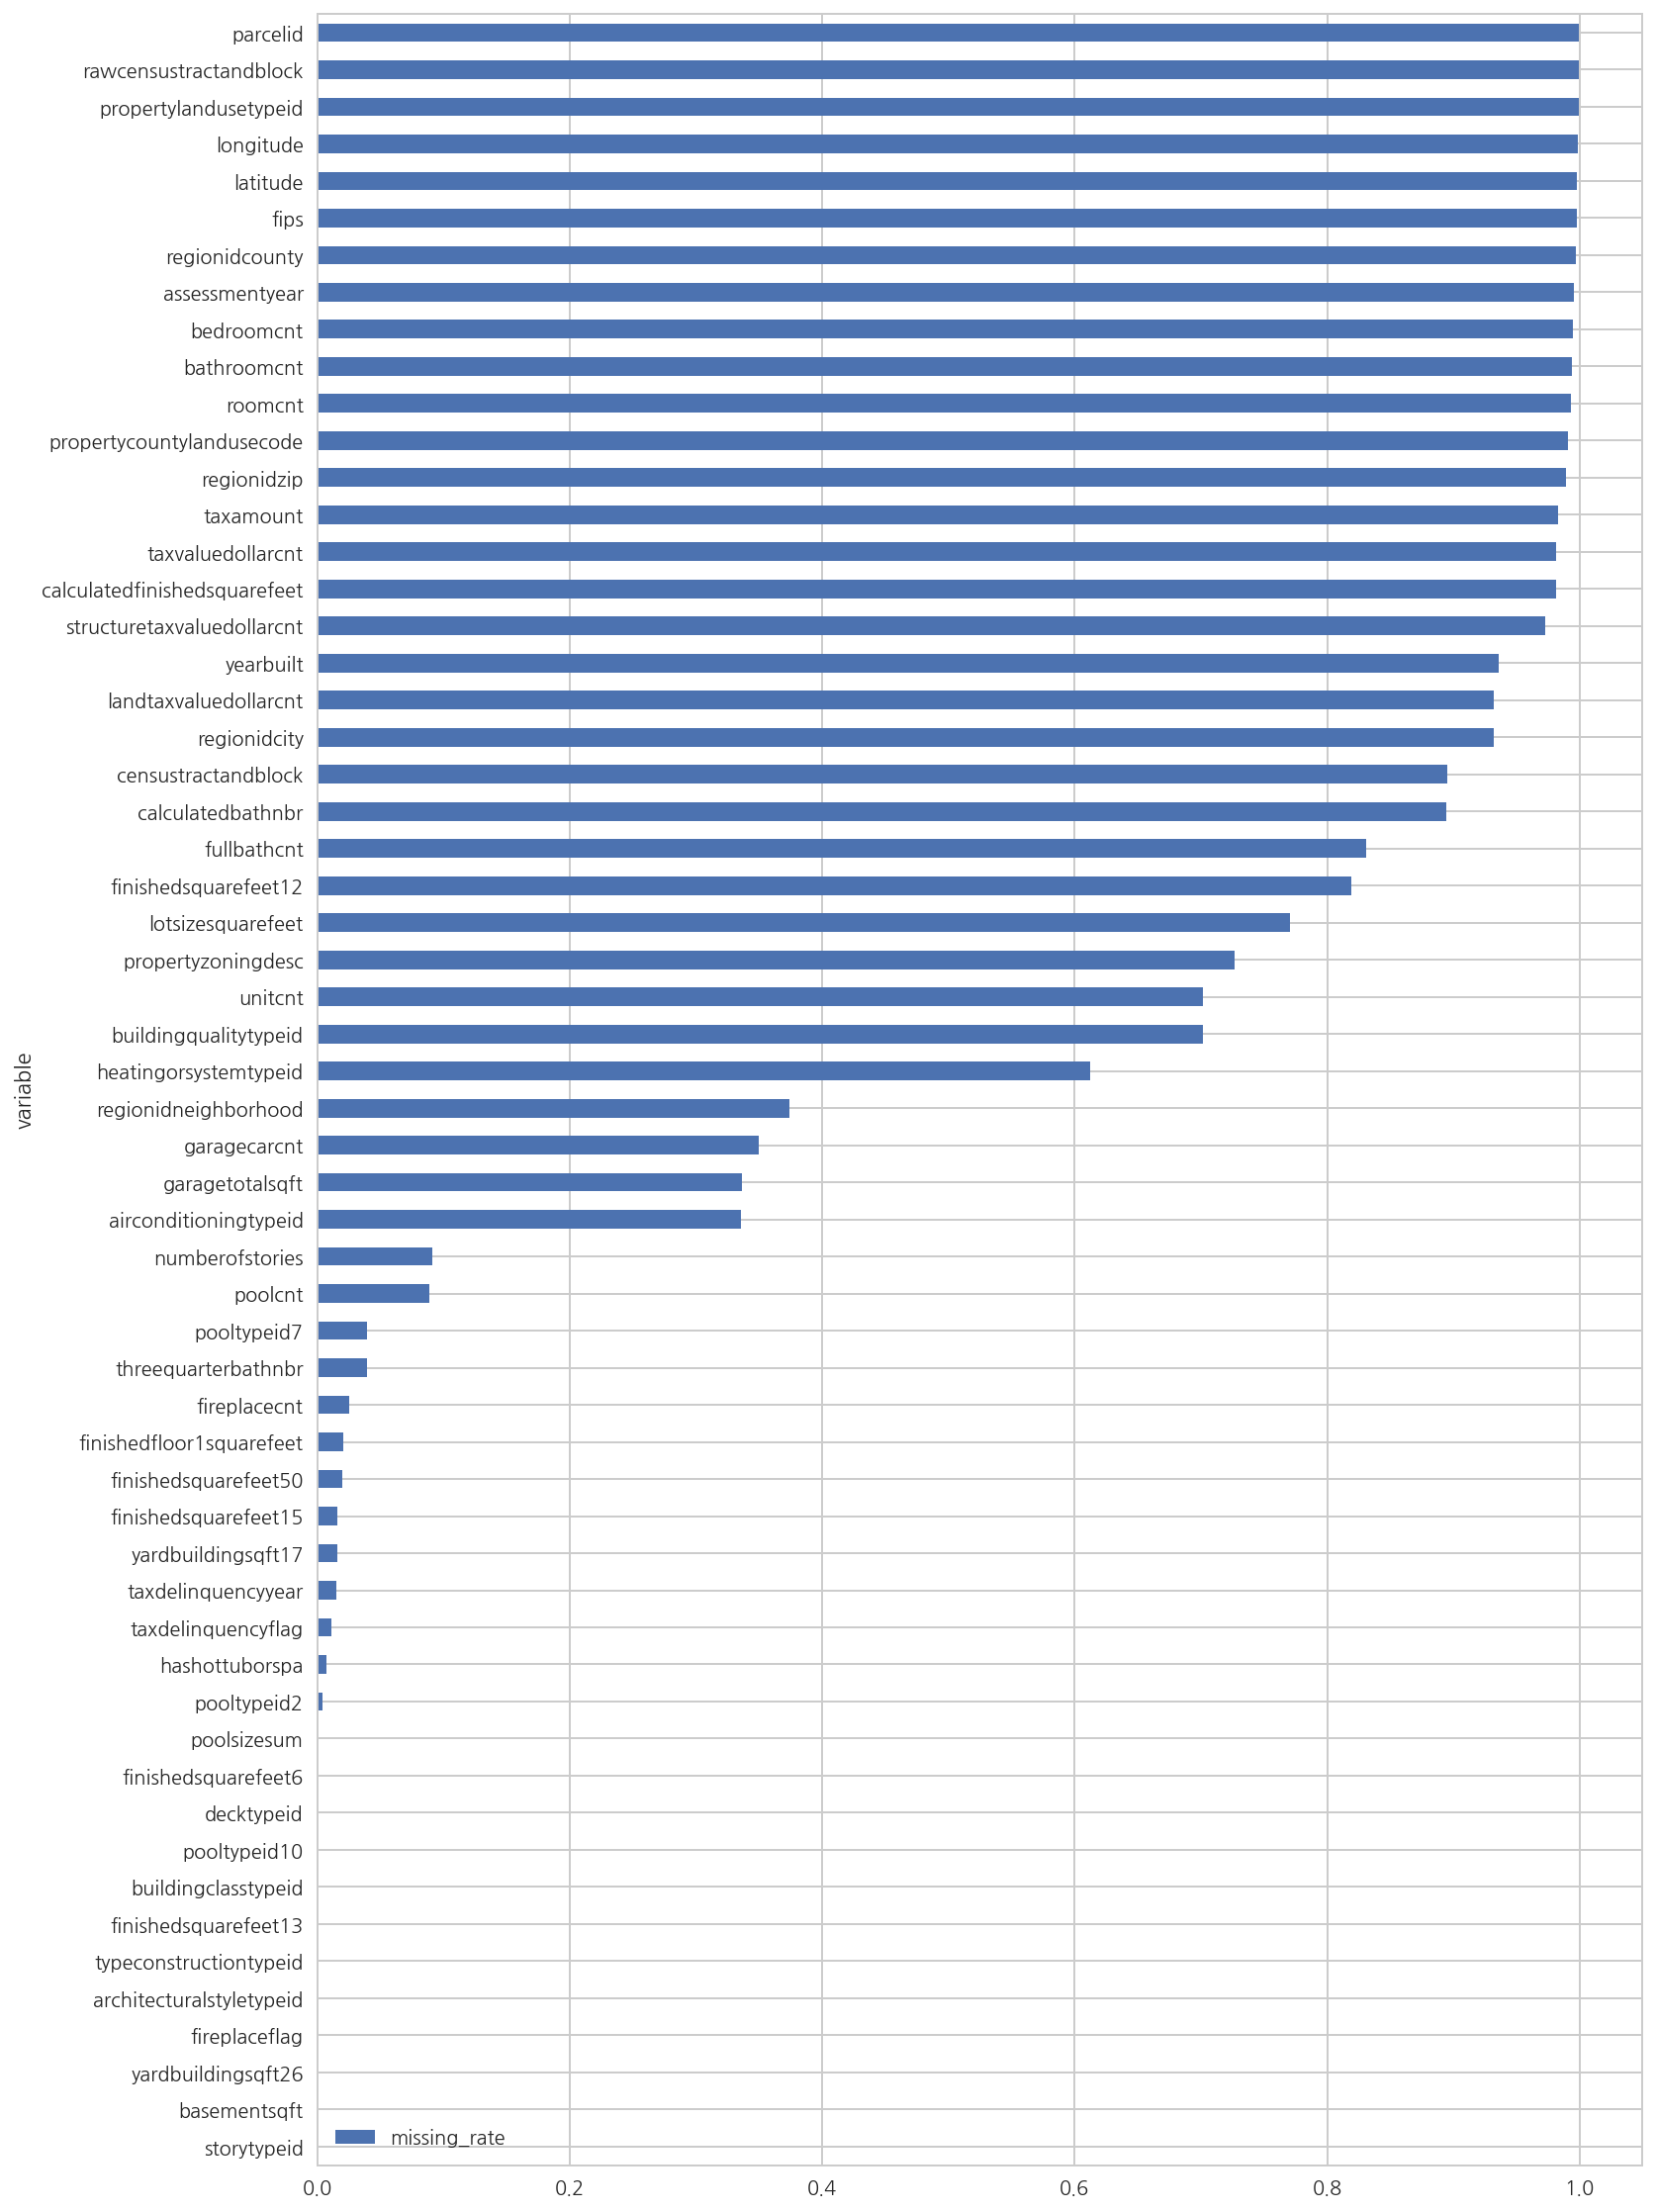

In [64]:
prop17_missing.sort_values(by = "missing_rate", ascending = True)\
.plot(kind = 'barh', figsize=(12,20))

#### properties 2016과 2017년 data에서 missing value 비교
- 2016가 2017의 missing value rate rank는 동일

In [125]:
prop16_missing.reset_index(inplace = True)
prop16_missing.rename(columns={"index":"variable"}, inplace = True)

In [126]:
prop17_missing.reset_index(inplace = True)
prop17_missing.rename(columns={"index":"variable"}, inplace = True)

In [116]:
prop_missing_rank = pd.DataFrame(columns = ["rank","var_2016","rate_2016","var_2017","rate_2017"])
prop_missing_rank["var_2016"] = prop16_missing["variable"]
prop_missing_rank["rate_2016"] = prop16_missing["missing_rate"]
prop_missing_rank["var_2017"] = prop17_missing["variable"]
prop_missing_rank["rate_2017"] = prop17_missing["missing_rate"]
prop_missing_rank["rank"] = np.arange(1, 59)
prop_missing_rank

,rank,var_2016,rate_2016,var_2017,rate_2017
0,1,storytypeid,0.999456,storytypeid,0.999456
1,2,basementsqft,0.999455,basementsqft,0.999455
2,3,yardbuildingsqft26,0.999113,yardbuildingsqft26,0.999114
3,4,fireplaceflag,0.99827,fireplaceflag,0.99827
4,5,architecturalstyletypeid,0.99797,architecturalstyletypeid,0.99797
5,6,typeconstructiontypeid,0.99774,typeconstructiontypeid,0.99774
6,7,finishedsquarefeet13,0.99743,finishedsquarefeet13,0.99743
7,8,buildingclasstypeid,0.995769,buildingclasstypeid,0.995735
8,9,decktypeid,0.994273,pooltypeid10,0.994303
9,10,finishedsquarefeet6,0.99263,decktypeid,0.994178


#### merged 2016, 2017의 missing value 분석
- 동일하진 않지만 순서에 큰 차이는 없음

In [ ]:
merged16_des = merged16.describe(include='all').transpose()
merged16_dtype = merged16.dtypes
merged16_des["dtype"] = merged16_dtype
merged16_des.tail()

In [ ]:
merged17_des = merged17.describe(include='all').transpose()
merged17_dtype = merged16.dtypes
merged17_des["dtype"] = merged16_dtype
merged17_des.tail()

In [ ]:
merged16_des["missing_rate"] = 1-(merged16_des["count"]/merged16.shape[0])
merged16_missing = pd.DataFrame(merged16_des["missing_rate"].sort_values(ascending=False))
merged16_missing.head()

In [ ]:
merged17_des["missing_rate"] = 1-(merged17_des["count"]/merged17.shape[0])
merged17_missing = pd.DataFrame(merged17_des["missing_rate"].sort_values(ascending=False))
merged17_missing.head()

In [134]:
merged16_missing.reset_index(inplace = True)
merged16_missing.rename(columns={"index":"variable"}, inplace = True)
merged17_missing.reset_index(inplace = True)
merged17_missing.rename(columns={"index":"variable"}, inplace = True)

In [135]:
merged_missing_rank = pd.DataFrame(columns = ["rank","var_2016","rate_2016","var_2017","rate_2017"])
merged_missing_rank["var_2016"] = merged16_missing["variable"]
merged_missing_rank["rate_2016"] = merged16_missing["missing_rate"]
merged_missing_rank["var_2017"] = merged17_missing["variable"]
merged_missing_rank["rate_2017"] = merged17_missing["missing_rate"]
merged_missing_rank["rank"] = np.arange(1, 61)
merged_missing_rank

,rank,var_2016,rate_2016,var_2017,rate_2017
0,1,buildingclasstypeid,0.999823,buildingclasstypeid,0.999807
1,2,finishedsquarefeet13,0.999634,finishedsquarefeet13,0.999459
2,3,basementsqft,0.999524,basementsqft,0.999356
3,4,storytypeid,0.999524,storytypeid,0.999356
4,5,yardbuildingsqft26,0.998948,yardbuildingsqft26,0.999098
5,6,fireplaceflag,0.997541,fireplaceflag,0.997784
6,7,architecturalstyletypeid,0.997109,architecturalstyletypeid,0.997333
7,8,typeconstructiontypeid,0.996688,typeconstructiontypeid,0.997127
8,9,finishedsquarefeet6,0.995336,finishedsquarefeet6,0.995027
9,10,decktypeid,0.992711,pooltypeid10,0.994009


In [161]:
prop_missing_rank.rename(columns={"var_2016":"var16_prop", "rate_2016":"rate16_prop", "var_2017":"var17_prop", "rate_2017":"rate17_prop"}, inplace = True)
merged_missing_rank.rename(columns={"var_2016":"var16_merge", "rate_2016":"rate16_merge", "var_2017":"var17_merge", "rate_2017":"rate17_merge"}, inplace = True)
missing_rank = pd.merge(merged_missing_rank, prop_missing_rank, on="rank")
missing_rank

,rank,var16_merge,rate16_merge,var17_merge,rate17_merge,var16_prop,rate16_prop,var17_prop,rate17_prop
0,1,buildingclasstypeid,0.999823,buildingclasstypeid,0.999807,storytypeid,0.999456,storytypeid,0.999456
1,2,finishedsquarefeet13,0.999634,finishedsquarefeet13,0.999459,basementsqft,0.999455,basementsqft,0.999455
2,3,basementsqft,0.999524,basementsqft,0.999356,yardbuildingsqft26,0.999113,yardbuildingsqft26,0.999114
3,4,storytypeid,0.999524,storytypeid,0.999356,fireplaceflag,0.99827,fireplaceflag,0.99827
4,5,yardbuildingsqft26,0.998948,yardbuildingsqft26,0.999098,architecturalstyletypeid,0.99797,architecturalstyletypeid,0.99797
5,6,fireplaceflag,0.997541,fireplaceflag,0.997784,typeconstructiontypeid,0.99774,typeconstructiontypeid,0.99774
6,7,architecturalstyletypeid,0.997109,architecturalstyletypeid,0.997333,finishedsquarefeet13,0.99743,finishedsquarefeet13,0.99743
7,8,typeconstructiontypeid,0.996688,typeconstructiontypeid,0.997127,buildingclasstypeid,0.995769,buildingclasstypeid,0.995735
8,9,finishedsquarefeet6,0.995336,finishedsquarefeet6,0.995027,decktypeid,0.994273,pooltypeid10,0.994303
9,10,decktypeid,0.992711,pooltypeid10,0.994009,finishedsquarefeet6,0.99263,decktypeid,0.994178


#### missing value rate 관찰 결과
- 34등 이후로는 0~10% 정도의 변수들인데 33등으로 가면 30%언저리 대로 확 뛰어오름
- 33등까지는 다 살펴봐서 그 변수를 살릴 수 있는지 판단을 해보는 것이 좋겠음

In [175]:
# missing value 1-33까지 변수명 - 모두 동일
merge_16 = list(missing_rank[missing_rank["rank"] <= 33]["var16_merge"])
merge_17 = list(missing_rank[missing_rank["rank"] <= 33]["var17_merge"])
prop_16 = list(missing_rank[missing_rank["rank"] <= 33]["var16_prop"])
prop_17 = list(missing_rank[missing_rank["rank"] <= 33]["var17_prop"])
# len([i for i in merge_16 if i in merge_17 and i in prop_16 and i in prop_17])
large_missing_var["variable"] = [i for i in merge_16 if i in merge_17 and i in prop_16 and i in prop_17]
large_missing_var

,0,variable
0,buildingclasstypeid,buildingclasstypeid
1,finishedsquarefeet13,finishedsquarefeet13
2,basementsqft,basementsqft
3,storytypeid,storytypeid
4,yardbuildingsqft26,yardbuildingsqft26
5,fireplaceflag,fireplaceflag
6,architecturalstyletypeid,architecturalstyletypeid
7,typeconstructiontypeid,typeconstructiontypeid
8,finishedsquarefeet6,finishedsquarefeet6
9,decktypeid,decktypeid


In [182]:
result = large_missing_var
result.to_csv("large_missing",index=False)

### missing value에서 버릴 것을 정하자 (살릴 방법이 있는 걸 찾아내자

##### 변수 (5) architecturalstyletypeid
- 집의 건축 스타일에 대한 1부터 27까지 categorical data

In [145]:
architecturalstyletypeid = pd.DataFrame(prop16["architecturalstyletypeid"])
arch_st_type = architecturalstyletypeid.groupby("architecturalstyletypeid").size().reset_index(name='counts')
arch_st_typebuildingclasstypeid

,architecturalstyletypeid,counts
0,2.0,201
1,3.0,58
2,5.0,19
3,7.0,5251
4,8.0,380
5,10.0,1
6,21.0,150
7,27.0,1


##### 변수 (6) basementsqft
- Finished living area below or partially below ground level
- 지하가 없어서 NaN 값일까? - 그렇다면 0으로 채울 수도 있는 것?

In [149]:
prop16_des.loc["basementsqft"].transpose()

count               1628
unique               NaN
top                  NaN
freq                 NaN
mean             646.883
std              538.793
min                   20
25%                  272
50%                  534
75%               847.25
max                 8516
dtype            float64
missing_rate    0.999455
Name: basementsqft, dtype: object

##### 변수 (9) buildingclasstypeid
- 건물이 fireproofed한 frame(non-combustible)를 갖고 있는지 분류 
- 0-5 cateogories, 5=non of above → 진짜 missing value
- 가장 많은 4는 그냥 wood, wood&steel frame

In [150]:
buildingclasstypeid = pd.DataFrame(prop16["buildingclasstypeid"])
buildingclasstypeid = buildingclasstypeid.groupby("buildingclasstypeid").size().reset_index(name='counts')
buildingclasstypeid

,buildingclasstypeid,counts
0,1.0,65
1,2.0,81
2,3.0,3161
3,4.0,9265
4,5.0,57


##### 변수 (9) decktypeid
- deck이 있다면 deck의 type, but data dict에 type 분류가 없음

In [151]:
decktypeid = pd.DataFrame(prop16["decktypeid"])
decktypeid = decktypeid.groupby("decktypeid").size().reset_index(name='counts')
decktypeid

,decktypeid,counts
0,66.0,17096


##### 변수 (13) finishedfloor1squarefeet
- Size of the finished living area on the first (entry) floor of the home
- finishedsquarefeet 변수끼리는 관련이 있을 수 도 있을 것 (빠져야되는 변수일 가능성이 높을 듯)

In [152]:
prop16_des.loc["finishedfloor1squarefeet"].transpose()

count             202717
unique               NaN
top                  NaN
freq                 NaN
mean             1380.63
std              632.869
min                    3
25%                 1012
50%                 1283
75%                 1615
max                31303
dtype            float64
missing_rate    0.932093
Name: finishedfloor1squarefeet, dtype: object

##### 변수 (16) finishedsquarefeet13
- Perimeter living area : perimeter living area가 뭔지 대체 모르겠음
- finishedsquarefeet 변수끼리는 관련이 있을 수도 있을 것 (빠져야되는 변수일 가능성이 높을 듯)

In [154]:
prop16_des.loc["finishedsquarefeet13"].transpose()

count              7672
unique              NaN
top                 NaN
freq                NaN
mean             1178.9
std             357.073
min                 120
25%                 960
50%                1296
75%                1440
max                2688
dtype           float64
missing_rate    0.99743
Name: finishedsquarefeet13, dtype: object

##### 변수 (18) finishedsquarefeet50
- Size of the finished living area on the first (entry) floor of the home
    - 변수 (13) finishedfloor1squarefeet와 설명이 동일!! 데이터 분포도 거의 비슷!!
- finishedsquarefeet 변수끼리는 관련이 있을 수 도 있을 것 (빠져야되는 변수일 가능성이 높을 듯)

In [155]:
prop16_des.loc["finishedsquarefeet50"].transpose()

count             202717
unique               NaN
top                  NaN
freq                 NaN
mean             1388.94
std              664.489
min                    3
25%                 1013
50%                 1284
75%                 1618
max                31303
dtype            float64
missing_rate    0.932093
Name: finishedsquarefeet50, dtype: object

##### 변수 (19) finishedsquarefeet6
- Base unfinished and finished area
- 변수 (6) basementsqft와의 관련성?

In [156]:
prop16_des.loc["finishedsquarefeet6"].transpose()

count             22001
unique              NaN
top                 NaN
freq                NaN
mean            2414.34
std              7695.3
min                 117
25%                1079
50%                1992
75%                3366
max              952576
dtype           float64
missing_rate    0.99263
Name: finishedsquarefeet6, dtype: object

In [183]:
# 18개 중에 가능성
- basementsqft
- poolcnt는 한번 볼만 할듯
- yardsquaresqft

SyntaxError: invalid syntax (<ipython-input-183-25a5983073cb>, line 3)

In [184]:
prop16_des.loc["numberofstories"].transpose()

count             682069
unique               NaN
top                  NaN
freq                 NaN
mean             1.40146
std             0.539076
min                    1
25%                    1
50%                    1
75%                    2
max                   41
dtype            float64
missing_rate    0.771518
Name: numberofstories, dtype: object

In [185]:
# numberofstories는 1fh sub 할 가능성이 있다?

In [186]:
prop16_des.loc["airconditioningtypeid"].transpose()

count             811519
unique               NaN
top                  NaN
freq                 NaN
mean             1.93117
std              3.14859
min                    1
25%                    1
50%                    1
75%                    1
max                   13
dtype            float64
missing_rate    0.728154
Name: airconditioningtypeid, dtype: object

In [188]:
airconditioningtypeid = pd.DataFrame(prop16["airconditioningtypeid"])
airconditioningtypeid = buildingclasstypeid.groupby("airconditioningtypeid").size().reset_index(name='counts')
airconditioningtypeid

KeyError: 'airconditioningtypeid'

In [189]:
prop16_des.loc["garagecarcnt"].transpose()

count             883267
unique               NaN
top                  NaN
freq                 NaN
mean             1.82352
std             0.610035
min                    0
25%                    2
50%                    2
75%                    2
max                   25
dtype            float64
missing_rate     0.70412
Name: garagecarcnt, dtype: object

In [190]:
prop16_des.loc["heatingorsystemtypeid"].transpose()

count           1.8064e+06
unique                 NaN
top                    NaN
freq                   NaN
mean               4.01205
std                3.29373
min                      1
25%                      2
50%                      2
75%                      7
max                     24
dtype              float64
missing_rate      0.394885
Name: heatingorsystemtypeid, dtype: object

In [191]:
heatingorsystemtypeid = pd.DataFrame(prop16["heatingorsystemtypeid"])
heatingorsystemtypeid = heatingorsystemtypeid.groupby("heatingorsystemtypeid").size().reset_index(name='counts')
heatingorsystemtypeid

,heatingorsystemtypeid,counts
0,1.0,262
1,2.0,1156830
2,6.0,27480
3,7.0,595453
4,10.0,39
5,11.0,16
6,12.0,25
7,13.0,1342
8,14.0,41
9,18.0,586


In [192]:
buildingqualitytypeid = pd.DataFrame(prop16["buildingqualitytypeid"])
buildingqualitytypeid = buildingqualitytypeid.groupby("buildingqualitytypeid").size().reset_index(name='counts')
buildingqualitytypeid

,buildingqualitytypeid,counts
0,1.0,69467
1,2.0,2
2,3.0,6
3,4.0,692160
4,5.0,21
5,6.0,94
6,7.0,1133238
7,8.0,51
8,9.0,25
9,10.0,39713


In [193]:
prop16_des.loc["unitcnt"].transpose()

count           1.97749e+06
unique                  NaN
top                     NaN
freq                    NaN
mean                1.18117
std                  2.4479
min                       1
25%                       1
50%                       1
75%                       1
max                     997
dtype               float64
missing_rate       0.337572
Name: unitcnt, dtype: object